In [22]:
import os.path as osp
import os
import matplotlib.pylab as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [29]:
%matplotlib inline

In [3]:
top_in_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/'

In [23]:
ae_tag_to_id = lambda ae_name: int(ae_name[len('nb_gan_ae_')])
experiment_id_to_bneck = {4: 64, 5: 256, 6: 512, 7: 32, 8: 128}
epochs_used = [1, 3, 10, 30, 100, 300, 400, 500]

In [33]:
experiments_dir = [osp.join(top_in_dir, name) for name in os.listdir(top_in_dir)]
best_exp = dict()
min_max_exp = dict()
for ex in experiments_dir:    
    ex_id = ae_tag_to_id(osp.basename(ex))
    bneck = experiment_id_to_bneck[ex_id]
    
    d = min_max_exp
    if 'best' in stat_file:
        d = best_exp
        
    d[bneck] = []
    
    stat_file = osp.join(ex, 'jsd_stats.txt')
    print stat_file
    with open(stat_file, 'r') as fin:        
        fin.readline()
        for line in fin:
            meas = float(line.rstrip().split(' ')[2])
            d[bneck].append(meas)

/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/nb_gan_ae_4_chamfer_chair_2048_best_epoch/jsd_stats.txt
/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/nb_gan_ae_8_chamfer_chair_2048_best_epoch/jsd_stats.txt
/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/nb_gan_ae_7_chamfer_chair_2048_max_min_epoch/jsd_stats.txt
/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/nb_gan_ae_6_chamfer_chair_2048_max_min_epoch/jsd_stats.txt
/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/nb_gan_ae_5_chamfer_chair_2048_best_epoch/jsd_stats.txt
/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/nb_gan_ae_6_chamfer_chair_2048_best_epoch/jsd_stats.txt
/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/nb_gan_ae_4_chamfer_chair_2048_max_min_epoch/jsd_stats.txt
/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthe

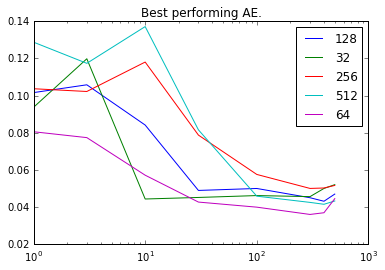

In [35]:
legend_tags = []
for bneck, values in best_exp.iteritems():
    plt.semilogx(epochs_used, values)
    legend_tags.append(str(bneck))
plt.legend(legend_tags)
plt.title('Best performing AE.')

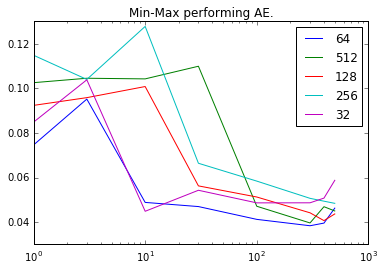

In [36]:
legend_tags = []
for bneck, values in min_max_exp.iteritems():
    plt.semilogx(epochs_used, values)
    legend_tags.append( str(bneck))
plt.legend(legend_tags)
plt.title('Min-Max performing AE.')